Enter an equation: sin(x)
Enter a lower bound: 0
Enter an upper bound: 10
Enter number of partitions: 15
Which Riemann sum? [left, right, mid, all]: mid


<IPython.core.display.Javascript object>


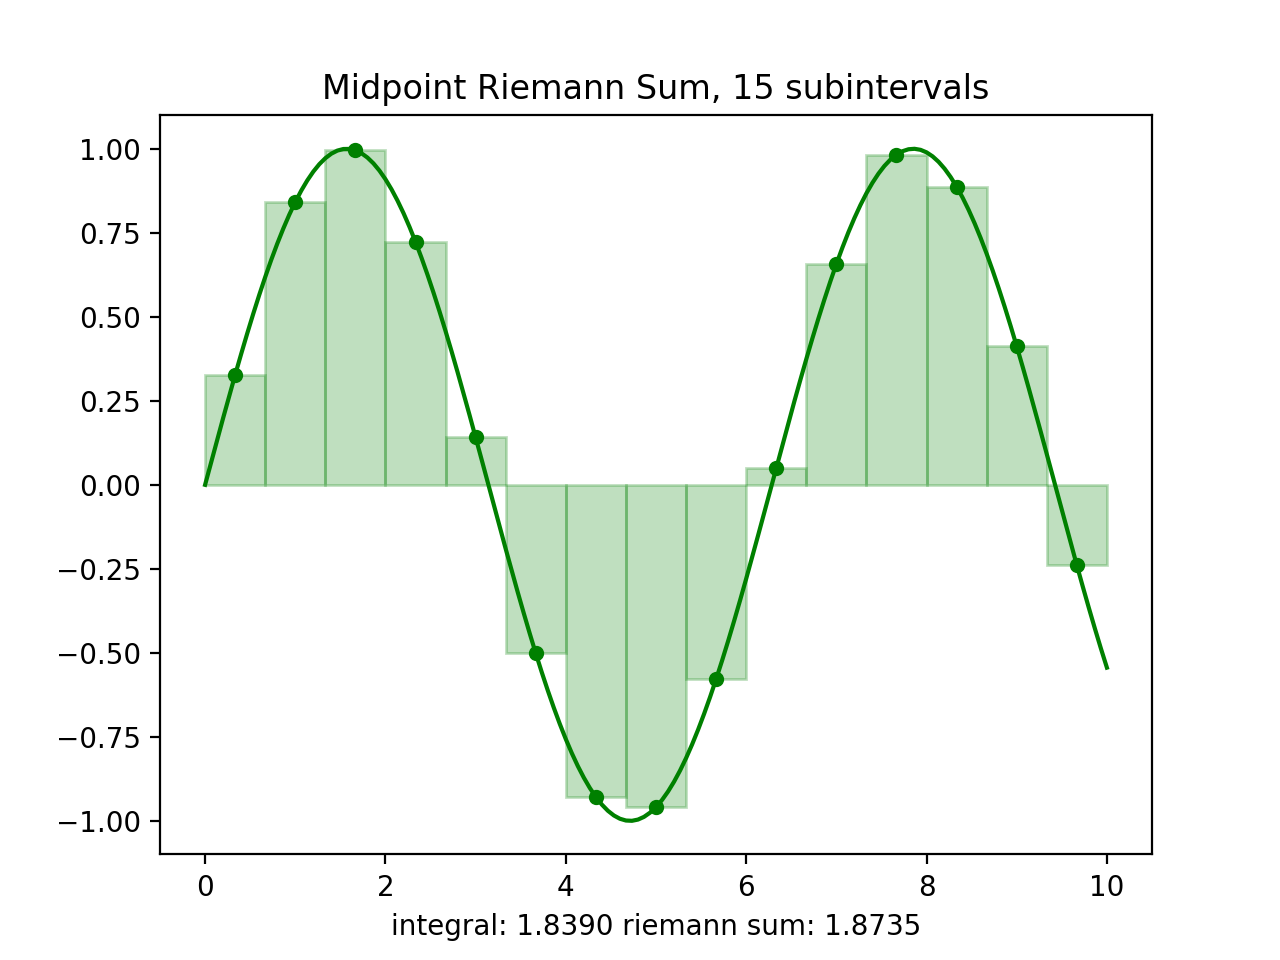

 overestimate by 0.0345 (1.8761%)


In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
from numpy import *
from scipy.integrate import quad

F = A = B = N = None

def main():
    global F, A, B, N
    try:
        usrin = input("Enter an equation: " )
        F = lambda x: eval(usrin)
        A = float(input("Enter a lower bound: "))
        B = float(input("Enter an upper bound: "))
        N = int(input("Enter number of partitions: "))
    except:
        print("Invalid input")
        main()
    sum_type = input("Which Riemann sum? [left, right, mid, all]: ")
    while sum_type.lower() != 'left' and sum_type.lower() != 'right' and sum_type.lower() != 'mid' and sum_type.lower() != 'all':
        print("Invalid sum type")
        sum_type = input("Which Riemann sum? [left, right, mid, all]: ")
    if sum_type.lower() == "left":
        left_sum()
    elif sum_type.lower() == "right":
        right_sum()
    elif sum_type.lower() == "mid":
        mid_sum()
    elif sum_type.lower() == "all":
        all_sum()

def left_sum():
    x = linspace(A,B,N+1)
    y = F(x)
    
    X = linspace(A,B,10*N+1)
    Y = F(X)
    
    plt.title("Left Riemann Sum, " + str(N) + " subintervals")
    x_left = x[:-1]
    y_left = y[:-1]
    plt.plot(x_left,y_left,'b.',markersize=9)
    plt.bar(x_left,y_left,width=(B-A)/N,alpha=0.25,align='edge',edgecolor='b')
    
    plt.plot(X,Y,'b')
    dx = (B-A)/N
    xleft = linspace(A,B-dx,N)
    left_sum = sum(F(xleft) * dx)
    plt.xlabel("integral: " + str(compute_integral()[0])[0:6] + " riemann sum: " + str(left_sum)[0:6])
    
    label = ""
    
    if abs(compute_integral()[0]) < abs(left_sum):
        label = " overestimate by " + str(abs(left_sum - compute_integral()[0]))[0:6]
        label += " (" + str(((left_sum - compute_integral()[0]) / compute_integral()[0])*100)[0:6] + "%)"
    elif abs(compute_integral()[0]) > abs(left_sum):
        label = " underestimate by " + str(abs(compute_integral()[0] - left_sum))[0:6]
        label += " (" + str(((compute_integral()[0] - left_sum) / compute_integral()[0])*100)[0:6] + "%)"
    plt.show()
    print(label)

def right_sum():
    x = linspace(A,B,N+1)
    y = F(x)
    
    X = linspace(A,B,10*N+1)
    Y = F(X)
    
    plt.title("Right Riemann Sum, " + str(N) + " subintervals")
    x_right = x[1:]
    y_right = y[1:]
    plt.plot(x_right,y_right,'r.',markersize=9)
    plt.bar(x_right,y_right,width=-(B-A)/N,alpha=0.25,align='edge',edgecolor='r',color='r')
    
    plt.plot(X,Y,'r')
    dx = (B-A)/N
    xright = linspace(dx,B,N)
    right_sum = sum(F(xright) * dx)
    plt.xlabel("integral: " + str(compute_integral()[0])[0:6] + " riemann sum: " + str(right_sum)[0:6])
    
    label = ""
    
    if abs(compute_integral()[0]) < abs(right_sum):
        label = " overestimate by " + str(abs(right_sum - compute_integral()[0]))[0:6]
        label += " (" + str(((right_sum - compute_integral()[0]) / compute_integral()[0])*100)[0:6] + "%)"
    elif abs(compute_integral()[0]) > abs(right_sum):
        label = " underestimate by " + str(abs(compute_integral()[0] - right_sum))[0:6]
        label += " (" + str(((compute_integral()[0] - right_sum) / compute_integral()[0])*100)[0:6] + "%)"
    plt.show()
    print(label)
    
def mid_sum():
    x = linspace(A,B,N+1)
    y = F(x)
    
    X = linspace(A,B,10*N+1)
    Y = F(X)
    
    plt.title("Midpoint Riemann Sum, " + str(N) + " subintervals")
    x_mid = (x[:-1] + x[1:])/2 
    y_mid = F(x_mid)
    plt.plot(x_mid,y_mid,'g.',markersize=9)
    plt.bar(x_mid,y_mid,width=(B-A)/N,alpha=0.25,edgecolor='g',color='g')
    
    plt.plot(X,Y,'g')
    dx = (B-A)/N
    xmid = linspace(dx/2,B - dx/2,N)
    mid_sum = sum(F(xmid) * dx)
    plt.xlabel("integral: " + str(compute_integral()[0])[0:6] + " riemann sum: " + str(mid_sum)[0:6])
    
    label = ""
    
    if abs(compute_integral()[0]) < abs(mid_sum):
        label = " overestimate by " + str(abs(mid_sum - compute_integral()[0]))[0:6]
        label += " (" + str(((mid_sum - compute_integral()[0]) / compute_integral()[0])*100)[0:6] + "%)"
    elif abs(compute_integral()[0]) > abs(mid_sum):
        label = " underestimate by " + str(abs(compute_integral()[0] - mid_sum))[0:6]
        label += " (" + str(((compute_integral()[0] - mid_sum) / compute_integral()[0])*100)[0:6] + "%)"
    plt.show()
    print(label)

def all_sum():
    x = linspace(A,B,N+1)
    y = F(x)
    
    X = linspace(A,B,10*N+1)
    Y = F(X)
    
    plt.title("All Riemann Sums, " + str(N) + " subintervals")
    
    x_left = x[:-1]
    y_left = y[:-1]
    x_mid = (x[:-1] + x[1:])/2 
    y_mid = F(x_mid)
    x_right = x[1:]
    y_right = y[1:]
    
    plt.plot(x_left,y_left,'b.',markersize=9)
    plt.plot(x_mid,y_mid,'g.',markersize=9)
    plt.plot(x_right,y_right,'r.',markersize=9)

    plt.bar(x_left,y_left,width=(B-A)/N,alpha=0.25,align='edge',edgecolor='b')
    plt.bar(x_mid,y_mid,width=(B-A)/N,alpha=0.25,edgecolor='g',color='g')
    plt.bar(x_right,y_right,width=-(B-A)/N,alpha=0.25,align='edge',edgecolor='r',color='r')
    
    plt.plot(X,Y,'b')
    dx = (B-A)/N
    
    xleft = linspace(A,B-dx,N)
    xmid = linspace(dx/2,B - dx/2,N)
    xright = linspace(dx,B,N)
    
    left_sum = sum(F(xleft) * dx)
    mid_sum = sum(F(xmid) * dx)
    right_sum = sum(F(xright) * dx)

    plt.xlabel("integral: " + str(compute_integral()[0])[0:6])
    
    left_error = ((left_sum - compute_integral()[0]) / compute_integral()[0])
    mid_error = ((mid_sum - compute_integral()[0]) / compute_integral()[0])
    right_error = ((right_sum - compute_integral()[0]) / compute_integral()[0])
    
    best_estimate = min(abs(left_error), abs(mid_error), abs(right_error))

    
    print("Left sum: " + str(left_sum))
    print("Midpoint sum: " + str(mid_sum))
    print("Right sum: " + str(right_sum))

    if best_estimate == abs(left_error):
        print("Best estimate was left sum with " + str(abs(left_error*100))[0:6] + "% error")
    elif best_estimate == abs(mid_error):
        print("Best estimate was midpoint sum with " + str(abs(mid_error*100))[0:6] + "% error")
    elif best_estimate == abs(right_error):
        print("Best estimate was right sum with " + str(abs(right_error*100))[0:6] + "% error")
    
    plt.show()
    
    

def compute_integral():
    return quad(F, A, B)
    
main()